<a href="https://colab.research.google.com/github/rohithreddy999/Advance_predictive/blob/main/HOUSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DIGITAL ASSIGNMENT-04

##ADVANCED PREDICTIVE ANALYTICS (MDI3003)

##CLASS ID - VL2023240104377

##NAME:K.SAI ROHITH REDDY

##REGNO:20MID0084

##SLOT:L3+L4


QUESTIONS

1. Keep only the ‘latitude’ and ‘longitude’ data and drop other columns.

2. Get a rough estimate about optimum number of clusters (k) through 2D visualization.

3. Get a rough estimate about optimum number of clusters (k) through Elbow method.

4. Normalize the data.

5. Perform K-Means clustering.

6. Visualize the clusters using appropriate color encoding


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the dataset
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
# Step 1:Keep only 'latitude' and 'longitude' columns
coordinates = data[['latitude', 'longitude']]
coordinates

,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
...,...,...
20635,39.48,-121.09
20636,39.49,-121.21
20637,39.43,-121.22
20638,39.43,-121.32


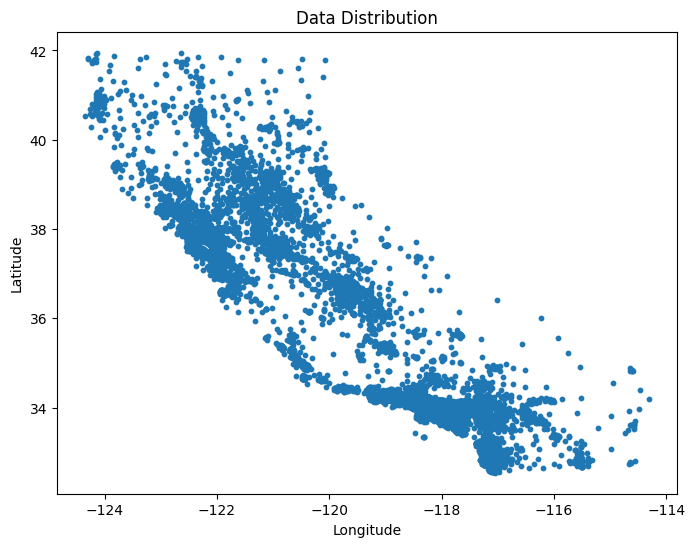

In [11]:
# Step 2: Get a rough estimate about optimum number of clusters (k) through 2D visualization.
plt.figure(figsize=(8, 6))
plt.scatter(coordinates['longitude'], coordinates['latitude'], s=10)
plt.title('Data Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
# Step 3: Get a rough estimate about optimum number of clusters (k) through Elbow method.
# Initialize an empty list to store the inertia values (sum of squared distances)
inertia = []

# Try a range of k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

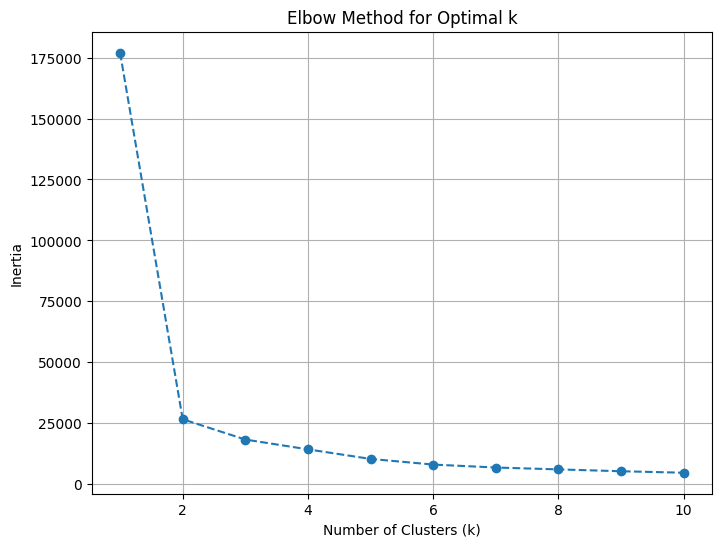

In [13]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [14]:
# From the Elbow method, you can visually estimate the optimal k value.
# In this case, it looks like k=3 might be a good choice.
# Step 4: Normalize the data (Standardization)
scaler = StandardScaler()
normalized_coordinates = scaler.fit_transform(coordinates)

In [15]:
# Step 5: Perform K-Means clustering with the chosen k value (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_coordinates)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

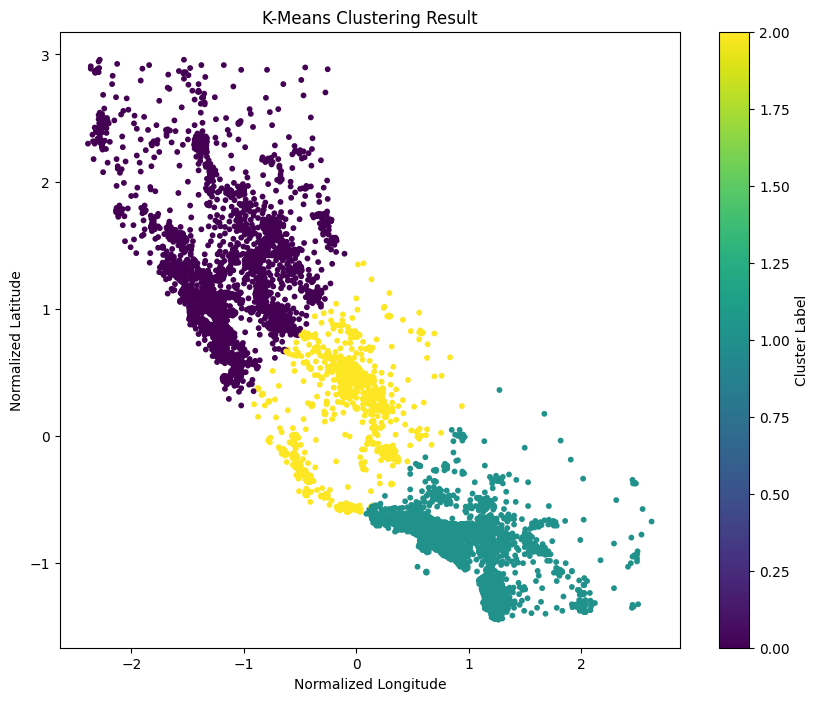

In [17]:
# Step 6:Visualize the clusters using appropriate color encoding
plt.figure(figsize=(10, 8))
plt.scatter(
    normalized_coordinates[:, 1],  # longitude
    normalized_coordinates[:, 0],  # latitude
    c=cluster_labels,
    cmap='viridis',
    s=10,
)
plt.title('K-Means Clustering Result')
plt.xlabel('Normalized Longitude')
plt.ylabel('Normalized Latitude')
plt.colorbar(label='Cluster Label')
plt.show()
